<a href="https://colab.research.google.com/github/zar55/COSC_635_Reinforcement_Learning/blob/main/Lab_03_zziauddin1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COSC-635: Lab 3

**Zargham Ziauddin**


## Getting Started

Follow the instructions below to set copy this notebook and to perform some initial setup.

1. Copy this notebook by selecting `File > Save a copy in Drive`.
2. A new window should open for the copied notebook. Move the new notebook to your course folder in Google Drive by selecting `File > Move` and then selecting the desired folder.
3. Update the name of the notebook by removing "Copy of" and replacing "Username" with your actual username.
4. Update the first cell in the notebook by specifying your course number (435 or 635) and by replacing "Student Name" with your actual name.
5. Mount your Google Drive by running the cell below and accepting the prompts you are presented with.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Preparing the Colab Environment

Run the cell below to install gymnasium and to download rltools to the virtual machine.

In [ ]:
%%capture
!pip install gymnasium==0.28.1
!rm rltools -r
!git clone https://github.com/drbeane/rltools.git

The cell below includes the import statements that you will need for this assignmnet.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

import rltools
import rltools.gym as gym
from rltools.utils import evaluate, create_gif
from rltools.dynamic_prog import DPAgent
from rltools.monte_carlo import MCAgent
from rltools.temp_diff import TDAgent
from gymnasium.envs.toy_text.frozen_lake import generate_random_map

## Note on Variable Names

You are free to select the variable names for the objects that you create in this notebook. But please make sure that the variable names you select in each part are distinct from those in other parts. An exception to this rulle can be made in instances where a particular variable will be used in a single cell, but no where else in the notebook.

# Part 1 - Frozen Lake

In Part 1 of this assignment, you will apply a variety of control methods to the Frozen Lake environment. In particular, you will apply value iteration, Monte Carlo control, and Q-learning.

## 1.A - Create Environment

In the cell below, we create an 16x16 instance of the Frozen Lake environment. You can rename this environment, if you wish. Otherwise, run this cell as-is.

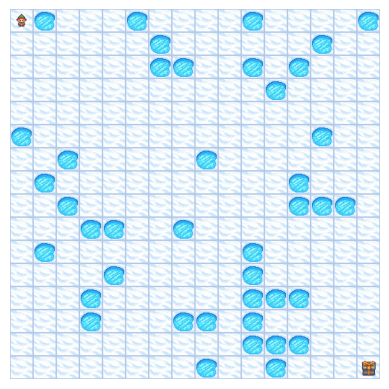

In [ ]:
env1 = gym.make(
    'FrozenLake-v1',
    prob = 0.9,
    rew_struct = [-0.2, -10, 100],
    desc = generate_random_map(size=16, p=0.8, seed=8),
    render_mode = 'rgb_array'
)

state, info = env1.reset()
plt.imshow(env1.render())
plt.axis('off')
plt.show()

## 1.B - Value Iteration

Complete the following steps in the cell below:

1. Create an instance of `DPAgent` for the environment from 1A. Set a discount rate of 1.0 and a seed of 1.
2. Use the agent to perform value iteration.
3. Use `evaluate()` to evaluate the optimal policy. Use 1000 episodes, `gamma=1.0`, `seed=1`, and `check_success=True`.

In [ ]:
## Creating DPAgent Instance of a Discount Rate (Gamma) of 1.0 & Seed of 1
dp_agent01 = DPAgent(env = env1,
                   gamma = 1.0,
                   seed = 1)

## Performing Value Iteration
dp_agent01.value_iteration()

## Evaluating the Optimal Policy of DPAgent of 1000 Episodes, Gamma of 1.0, & Seed of 1
dp_eval_results01 = evaluate(env = env1,
                             agent = dp_agent01,
                             gamma = 1.0,
                             episodes = 1000,
                             seed = 1,
                             check_success = True)

Value iteration required 328 steps to converge.
Mean Return:    83.519
StdDev Return:  25.3604
Mean Length:    51.505
StdDev Length:  19.0058
Success Rate:   0.942


## 1.C - Monte Carlo Control

Create an instance of `MCAgent` for `env1` with `gamma=1.0`. Then apply Monte Carlo control. Guidelines for the parameter selection are provided below.
* Use 20,000 to 50,000 episodes. The fewer required to get the desired performance, the better.
* Set `max_steps` to 500.
* Experiment with `alpha`, `alpha_decay`, `epsilon`, and `epsilon_decay`.
* Set `exploring_starts=True`.
* Set a seed value for the sake of reproducability.
* Display an update every 1000 episodes.
* Use 1000 episodes for evaluation.
* Set `check_success=True`.

Your goal is to find a policy with a success rate of at least 0.8, but you are encouraged to try to do even better, if possible. Note that the optimal policy found by value iteration had a success rate of around 0.94.

In [ ]:
## Creating MCAgent Instance w/ a Discount Rate (Gamma) of 1.0
mc_agent01 = MCAgent(env = env1,
                     gamma = 1.0
                     )

## Applying Monte Carlo Control
mc_agent01.control(episodes = 20000,
                   max_steps = 500,

                   alpha = .02,
                   alpha_decay = 1e-6,

                   epsilon = .02,
                   epsilon_decay = 1e-6,

                   exploring_starts = True,

                   seed = 42,

                   updates = 1000,
                   eval_eps = 1000,
                   check_success = True
                   )

Episode   Mean[Return]  SD[Return]  Mean[Length]  SD[Length]  Success_Rate
--------------------------------------------------------------------------
1000          -10.0352      0.1147        1.1760      0.5736        0.0000  (Saving new best model)
2000          -42.7520     63.6674      374.2840    141.3726        0.3430  
3000           34.0022     46.7372       96.6890     68.8164        0.5740  
4000           35.7838     46.4775       99.3310     72.1195        0.5950  
5000           69.3410     34.5480       78.9450     39.3892        0.8630  (Saving new best model)
6000           73.5872     37.0032       51.6640     26.9434        0.8520  (Saving new best model)
7000           76.3068     33.9925       52.3660     26.1335        0.8780  (Saving new best model)
8000           74.4000     36.4951       50.3500     26.0909        0.8570  
9000           76.1396     34.4591       52.1020     25.6916        0.8760  
10000          74.5720     36.3225       51.1400     25.4170     

## 1.D - Evaluating Monte Carlo Policy

Use `evaluate()` to evaluate the policy found by the Monte Carlo agent. Use 1000 episodes, `gamma=1.0`, `seed=1`, and `check_success=True`.

**If your agent does not have a success rate of at least 0.8, then you should adjust the parameters from 1.E and retrain the agent.**


In [ ]:
## Evaluating the Policy found by the MCAgent w/ a 1000 Episodes, Discount Rate (Gamma) of 1.0 & Seed of 1
mc_eval_results01 = evaluate(env = env1,
                             agent = mc_agent01,
                             gamma = 1.0,
                             episodes = 1000,
                             seed = 1,
                             check_success = True
                             )

Mean Return:    77.7252
StdDev Return:  36.9155
Mean Length:    33.724
StdDev Length:  12.0809
Success Rate:   0.857


## 1.E - Q-Learning

Create an instance of `TDAgent` for the environment from 1.A, setting `gamma=1.0`. Then apply Q-learning. Use the same guidelines for parameter selection as those described for Monte Carlo control in Step 1.C. You do not need to use the exact same parameters, however.

Your goal is to find a policy with a success rate of at least 0.9, but you are encouraged to try to do even better, if possible. Note that the optimal policy found by value iteration had a success rate of around 0.94

In [ ]:
## Creating a TDAgent Instance w/ a Discount Rate (Gamma) of 1.0
td_agent01 = TDAgent(env = env1,
                     gamma = 1.0
                     )
## Applying Q-Learning to TDAgent
td_agent01.q_learning(episodes = 20000,
                      max_steps = 500,

                      alpha = .015,
                      alpha_decay = 1e-6,

                      epsilon = .015,
                      epsilon_decay = 1e-6,
                      exploring_starts = True,

                      seed = 42,

                      updates = 1000,
                      eval_eps = 1000,
                      check_success = True
                      )

Episode   Mean[Return]  SD[Return]  Mean[Length]  SD[Length]  Success_Rate
--------------------------------------------------------------------------
1000          -13.6380      3.7769       19.1900     18.8844        0.0000  (Saving new best model)
2000          -99.9008      2.2538      499.4060     13.4275        0.0000  
3000          -76.7070     32.6332      360.0640    182.1230        0.0000  
4000          -33.2230     28.9212      122.0860    153.7554        0.0020  
5000          -15.9232      7.1512       30.6650     36.3604        0.0000  
6000          -50.6272     30.4692      210.1740    161.1034        0.0010  
7000            0.4378     55.0307      170.4390    111.1954        0.4010  
8000          -39.9248     73.6819      391.1590    150.2188        0.3870  
9000           50.9148     49.5256      131.2580    109.5867        0.7890  (Saving new best model)
10000          -4.4224     35.2919       40.7620     27.8677        0.1230  
11000          -0.6722     62.7172

## 1.F - Evaluating Q-Learning Policy

Use `evaluate()` to evaluate the policy found by the TD agent. Use 1000 episodes, `gamma=1.0`, `seed=1`, and `check_success=True`.

**If your agent does not have a success rate of at least 0.9, then you should adjust the parameters from 1.E and retrain the agent.**

In [ ]:
## Evaluating the Policy found by the TDAgent w/ a 1000 Episodes, Discount Rate (Gamma) of 1.0 & Seed of 1
td_eval_results01 = evaluate(env = env1,
                             agent = td_agent01,
                             gamma = 1.0,
                             episodes = 1000,
                             seed = 1,
                             check_success = True
                             )

Mean Return:    83.9074
StdDev Return:  24.0365
Mean Length:    53.413
StdDev Length:  20.2845
Success Rate:   0.949


# Part 2 - Cart Pole Environment

In Part 2, you will apply Monte Carlo control and Q-Learning to the Cart Pole environment. This environment has a continuous state space, so we will need to discretize the state space to use these algorithms. Note that we do not have direct access to the MDP for the discretized version of this environment, so we cannot apply value iteration to find the optimal policy.

## 2.A - Create Environment

The cell below creates an instance of the Cart Pole environment in which the state coordinates are discretized by splitting them each across 25 bins. You can rename this environment, if you wish. Otherwise, run this cell as-is.

In [ ]:
env2 = gym.make(
    "CartPole-v1", num_bins=25,
    render_mode='rgb_array',
)

## 2.B - Monte Carlo Control

Create an instance of `MCAgent` for the environment from 2.A with `gamma=1.0`. Then apply Monte Carlo control. Guidelines for the parameter selection are provided below.
* Use 20,000 to 50,000 episodes. The fewer required to get the desired performance, the better.
* Set `max_steps` to 1000.
* Experiment with `alpha`, `alpha_decay`, `epsilon`, and `epsilon_decay`.
* Set `exploring_starts=False`.
* Set a seed value for the sake of reproducability.
* Display an update every 1000 episodes.
* Use 100 episodes for evaluation.
* Set `check_success=False`.

Your goal is to find a policy that satisfies the following two criteria:
* `Mean[Return] > 500`
* `Mean[Return] - SD[Return] > 250`

**Note: It is possible to meet (and considerably exceed) this goal in 20,000 episodes.**

In [ ]:
## Creating MC Agent Instance w/ a Discount Rate (Gamma) of 1.0
mc_agent02 = MCAgent(env = env2,
                     gamma = 1.0
                     )

## MC Control for the MCAgent
mc_agent02.control(episodes = 20000,
                   max_steps = 1000,

                   alpha = .20,
                   alpha_decay = 1e-5,

                   epsilon = .20,
                   epsilon_decay = 1e-5,

                   exploring_starts = False,

                   seed = 42,

                   updates = 1000,
                   eval_eps = 100,
                   check_success = False
                   )

Episode   Mean[Return]  SD[Return]  Mean[Length]  SD[Length]
------------------------------------------------------------
1000          115.1600     34.7119      116.1600     34.7119  (Saving new best model)
2000          386.9300    274.4299      387.8100    274.1619  (Saving new best model)
3000          440.3700    302.4520      441.2100    302.1561  (Saving new best model)
4000          198.6800     80.0035      199.6800     80.0035  
5000          379.0800    235.6726      380.0400    235.5672  (Saving new best model)
6000          222.6300     69.2632      223.6300     69.2632  (Saving new best model)
7000          263.7700    184.7547      264.7700    184.7547  
8000          404.9800    269.4245      405.9000    269.2479  
9000          637.4300    328.7402      638.0800    328.3543  (Saving new best model)
10000         295.7300    173.5712      296.7300    173.5712  
11000         220.5200     99.8531      221.5200     99.8531  
12000         337.0900    170.9098      338.080

## 2.C - Evaluating Monte Carlo Policy


Use `evaluate()` to evaluate the policy found by the Monte Carlo agent. Use 500 episodes, `gamma=1.0`, `seed=1`, `max_steps=1000`, and `check_success=False`.



In [ ]:
## Evaluating Policy found by MCAgent with 500 Episodes, Discount Rate (Gamma) of 1.0, Seed of 1, & Max Steps of 1000
mc_eval_results02 = evaluate(env = env2,
                             agent = mc_agent02,
                             gamma = 1.0,
                             seed = 1,
                             max_steps = 1000,
                             episodes = 500,
                             check_success = False
                             )

Mean Return:    745.086
StdDev Return:  316.3835
Mean Length:    745.568
StdDev Length:  315.9662


## 2.D - Animate an Episode using MC Policy

Use the `create_gif()` function to animate an episode following the policy found by the MC Agent. Store the gif in a folder named `gifs` and name the gif `cartpole_01`. Leave `max_steps` at the default value of 1000. Set a seed for the episode. Adjust the seed until you find an episode with a length of at least 500 steps.

1000 steps completed.
Cumulative reward: 1000.0


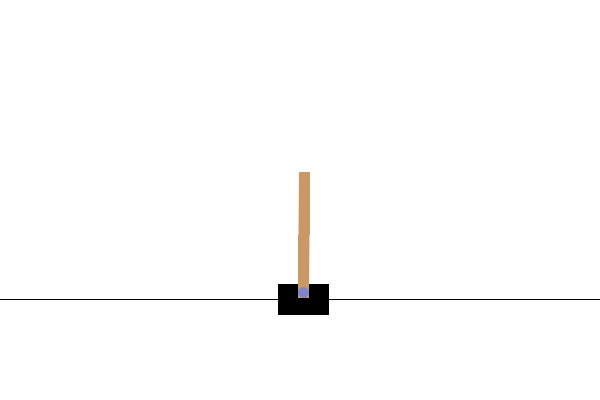

In [ ]:
create_gif(env = env2,
           agent = mc_agent02,
           seed = 50,
           folder = 'gifs',
           filename = 'cartpole_01',
           display_gif = True
           )

## 2.E - Q-Learning

Create an instance of `TDAgent` for the environment from 2.A, setting `gamma=1.0`. Use the agent to apply Q-learning. Use the same guidelines for parameter selection as those described for Monte Carlo control in Step 2.B. You do not need to use the exact same parameters, however.

Your goal is to find a policy that satisfies the following criteria:
* `Mean[Return] - SD[Return] > 950`

**Note: It is possible to meet this goal in 20,000 episodes. Perfect performance can be obtained in as few as 13,000 episodes with the right parameters.**

In [ ]:
## Creating TDAgent Instance w/ a Discount Rate of 1.0
td_agent02 = TDAgent(env = env2,
                     gamma = 1.0)

## Applying Q-Learning to TDAgent
td_agent01.q_learning(episodes = 20000,

                      alpha = .3,
                      alpha_decay = 1e-5,

                      epsilon = 1.0,
                      epsilon_decay = 5e-4,


                      seed = 40,

                      updates = 1000,
                      eval_eps = 1000
                      )

Episode   Mean[Return]  SD[Return]  Mean[Length]  SD[Length]
------------------------------------------------------------
1000           77.6928     34.2819       50.9360     19.9189  (Saving new best model)
2000        -1768.8398   1762.6907     8878.7990   8814.4197  
3000           55.2178     47.9152       64.3110     30.1298  
4000         -251.1038    261.9773     1314.8690   1285.8652  
5000           23.1360     94.2760      313.2700    433.7621  
6000           80.5950      9.9656       98.0250     49.8282  (Saving new best model)
7000           74.4130     24.7061       94.2850     55.9608  
8000           79.8762     11.7431      100.5190     53.3577  
9000          -42.4868    119.7243      711.2340    597.5220  
10000          79.3350     23.5547       72.9750     44.0082  
11000          80.3430      9.8180       99.2850     49.0898  
12000          80.7090     10.2152       96.9050     48.6063  
13000          79.9554     10.1505      101.2230     50.7525  
14000        

## 2.F - Evaluating Q-Learning Policy

Use `evaluate()` to evaluate the policy found by the TD agent. Use 500 episodes, `gamma=1.0`, `seed=1`, `max_steps=1000`, and `check_success=False`.



In [ ]:
td_eval_results02 = evaluate(env = env2,
                             agent = td_agent02,
                             gamma = 1.0,
                             episodes = 500,
                             max_steps = 1000,
                             seed = 1,
                             check_success = False
                             )

Mean Return:    47.468
StdDev Return:  16.3493
Mean Length:    48.468
StdDev Length:  16.3493


## 2.G - Animate an Episode using TD Policy

Use the `create_gif()` function to animate an episode following the policy found by the TD Agent. Store the gif in a folder named `gifs` and name the gif `cartpole_02`. Leave `max_steps` at the default value of 1000. Set a seed for the episode. Adjust the seed until you find an episode with a length of at least 950 steps.

54 steps completed.
Cumulative reward: 53.0


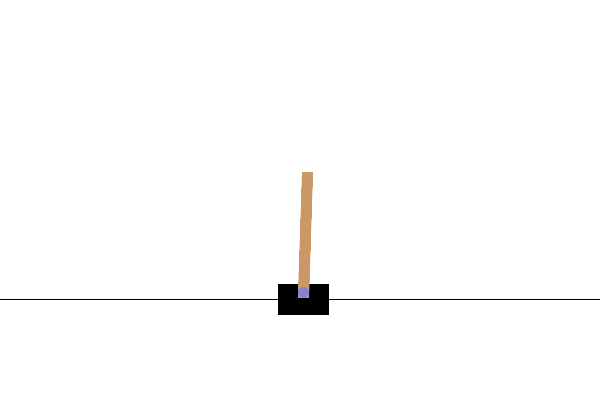

In [ ]:
create_gif(env = env2,
           agent = td_agent02,
           seed = 42,
           folder = 'gifs',
           filename = 'cartpole_2',
           display_gif = True
           )

# Submission Instructions

1. The cell below will generate an HTML render of your notebook within the same Google Drive folder in which you stored this notebook. Adjust the path for your notebook in the cell below as needed.
2. Restart your notebook and run it from start to finish.
3. If the notebook executes without error, download the HTML export of the notebook and then upload it to Canvas. Make sure to carefully review the contents of the HTML export to ensure that everything is displayed correctly.
4. Click on "Share" in the upper-right corner of this notebook. Then select "Anyone with the link" from dropdown. Click "Copy Link" and paste the copied link as a comment in your submission on Canvas.


In [ ]:
%%capture
time.sleep(30)
!jupyter nbconvert --to html /content/drive/MyDrive/COSC_635/Lab_03_zziauddin1.ipynb